#### Objective of this kernel:
* To implement svm machine learning algorithm
* To save our model 
* To  measure the accuracy of the model

## Importing our libraries 

In [87]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the "../output/" directory.
import os
for dirname, _, filenames in os.walk('./output/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

./output/linearmodel.pickle
./output/naive_bayes.pickle
./output/KNNmodel.pickle
./output/processed_data.csv
./output/cleaned_data.csv
./output/Logregmodel.pickle
./output/SVMmodel.pickle
./output/.ipynb_checkpoints/cleaned_data-checkpoint.csv


## Reading the data set

In [45]:
df = pd.read_csv('./output/cleaned_data.csv')
df.shape

(238, 8)

## we are going to transform all our categorical data to proper format to be fed to our machine learning algorithms
* We preprocess our data with the LabelEncoder from sklearn

#### Preprocessing our independent variable x and dependent variable y

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
#preprocessing x
Age=label_encoder_x.fit_transform(list(df["Age"]))
Gender=label_encoder_x.fit_transform(list(df["Gender"]))
wassce_grade=label_encoder_x.fit_transform(list(df["wassce grade"]))
level=label_encoder_x.fit_transform(list(df["level"]))
access_to_a_laptop_or_internet=label_encoder_x.fit_transform(list(df["access to a laptop or internet"]))
study_group=label_encoder_x.fit_transform(list(df["study group"]))
time_spent_on_independent_studies=label_encoder_x.fit_transform(list(df["time spent on independent studies"]))

current_CGPA=label_encoder_x.fit_transform(list(df["current CGPA"]))


x=list(zip(Age,Gender,wassce_grade,access_to_a_laptop_or_internet,study_group,time_spent_on_independent_studies,))
y=list(current_CGPA)

In [41]:
y[:,0] =label_encoder_x.fit_transform(y[:,0])
y.dtype
y=y.astype('int')
y.dtype

dtype('int64')

# Lets start implementing svm machine learning algorithm on our dataset

### Fitting the training data

In [88]:
from sklearn.model_selection import train_test_split
import pickle
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Initializing Support Vector Machine and fitting the training data

In [109]:
from sklearn.svm import SVC
best = 0
for r in range(20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
    classifier = SVC(kernel='rbf', random_state = r)
    classifier.fit(x_train,y_train)
    classifier_score = classifier.score(x_test,y_test)
    if classifier_score > best:
        best = classifier_score
        with open("./output/SVMmodel.pickle","wb") as f:
                pickle.dump(classifier,f)
                
print(classifier_score)

0.5


### Predicting the classes for test set

In [110]:
y_pred = classifier.predict(x_test)
print ("Predicted Value:", y_pred)

Predicted Value: [3 2 2 3 3 2 3 2 2 2 2 2 3 2 3 3 3 3 2 3 2 3 4 2]


### Calculating the accuracy of the predictions

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred )
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.5


In [112]:
import warnings
warnings.filterwarnings('ignore') 
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("Accuracy of SVM Classifier: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print("\nConfusion Matrix of SVM Classifier:\n")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report of SVM Classifier:\n")
print(classification_report(y_test, y_pred))

Accuracy of SVM Classifier: 50.0%

Confusion Matrix of SVM Classifier:

[[0 1 1 0]
 [0 7 5 0]
 [0 3 4 0]
 [0 1 1 1]]

Classification Report of SVM Classifier:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.58      0.58      0.58        12
           3       0.36      0.57      0.44         7
           4       1.00      0.33      0.50         3

    accuracy                           0.50        24
   macro avg       0.49      0.37      0.38        24
weighted avg       0.52      0.50      0.48        24



Text(0.5, 427.9555555555555, 'Predicted label')

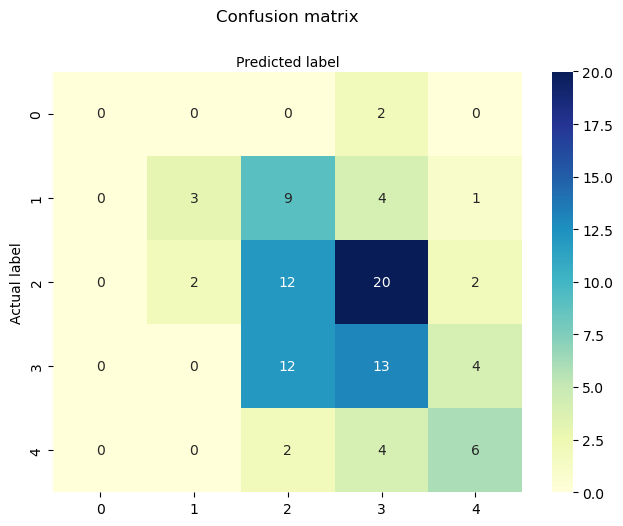

In [59]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### loading Svm model so we dont have to rerun our algorithm 

In [82]:
pickle_in = open("./output/SVMmodel.pickle","rb")
linear = pickle.load(pickle_in)